In [944]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [945]:
df = pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [946]:
df.shape

(50000, 13)

In [947]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


## Handling NA values

In [948]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [949]:
df[df['Smoking_Status'].isna()]

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
177,26,Female,Southwest,Married,3,Underweight,NaN,Salaried,> 40L,69,Diabetes,Gold,22605
15648,47,Male,Southwest,Married,4,Normal,NaN,Freelancer,25L - 40L,32,Diabetes,Gold,26100
16324,45,Male,Northwest,Married,4,Overweight,NaN,Salaried,10L - 25L,16,High blood pressure & Heart disease,Silver,21881
16941,34,Male,Southwest,Married,5,Normal,NaN,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Gold,25865
16975,23,Male,Southwest,Unmarried,0,Normal,NaN,Freelancer,<10L,3,No Disease,Bronze,6001
18005,61,Female,Southwest,Married,2,Normal,NaN,Self-Employed,25L - 40L,27,Thyroid,Gold,32501
19218,19,Female,Northeast,Unmarried,0,Normal,NaN,Salaried,10L - 25L,23,No Disease,Bronze,9010
20335,50,Female,Northeast,Married,3,Underweight,NaN,Salaried,25L - 40L,25,High blood pressure,Gold,27317
22833,69,Male,Southeast,Married,2,Normal,NaN,Freelancer,<10L,9,Diabetes,Silver,23118
25519,54,Male,Southwest,Married,3,Overweight,NaN,Salaried,> 40L,54,High blood pressure & Heart disease,Silver,24907


In [950]:
#since the entries are very less we can drop these

In [951]:
df.dropna(inplace=True)
df.isna().sum()

Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64

In [952]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [953]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

# Handling Outliers

## Numerical Columns

In [954]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [955]:
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

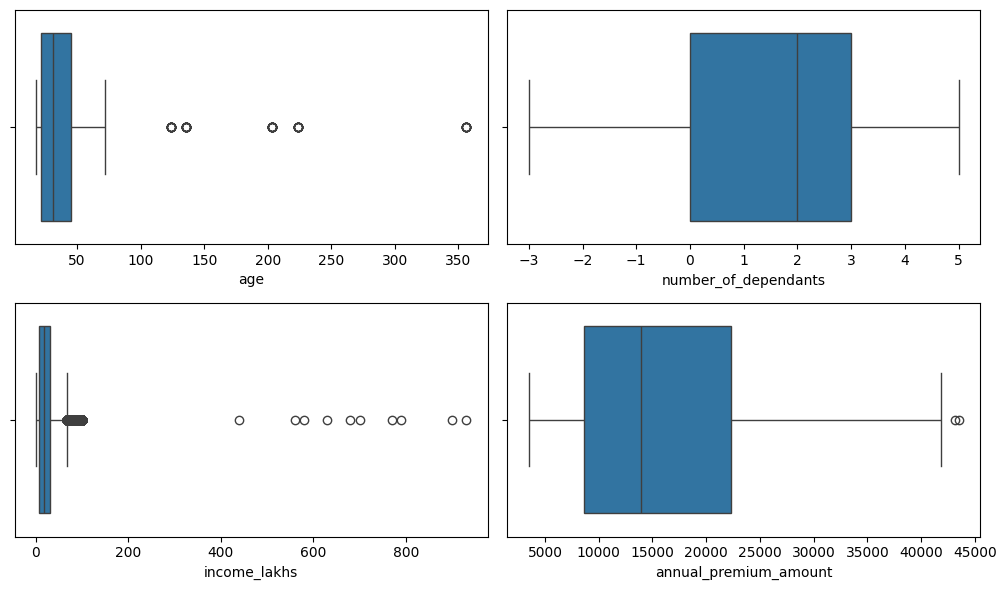

In [1162]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x=df[column], ax=ax)

plt.tight_layout()
plt.show()

In [957]:
# 2 Columns having outliers 1.age 2.income_lakhs

### AGE

In [958]:
print(df[df.age>100]['age'].unique())
df[df.age>100]['age'].value_counts().sum()

[224 124 136 203 356]


np.int64(58)

In [959]:
df[df.age<=100].shape

(49918, 13)

In [960]:
df.shape[0]-58


49918

In [961]:
df1 = df[df['age']<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.712168,23.025141,15766.589286
std,13.681600,1.498324,24.227912,8419.137327
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


In [962]:
df.shape,df1.shape

((49976, 13), (49918, 13))

### number_of_dependants

In [963]:
## number of dependants are having -ve values fixing it

In [964]:
df1[df1['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [965]:
# only 2 enteries making it +ve

In [966]:
df1['number_of_dependants']=df1['number_of_dependants'].abs()

In [967]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


### income_lakhs

In [968]:
df1.income_lakhs.describe()

count    49918.000000
mean        23.025141
std         24.227912
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [969]:
def iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return lower_bound,upper_bound

In [970]:
iqr_bounds(df1['income_lakhs'])

(-29.0, 67.0)

In [971]:
#lower_bound < min : no issues
#upper_bound < max : issues 
#generally values > upper_bound treated as outliers

In [972]:
df1.income_lakhs.quantile(0.98),df.income_lakhs.quantile(0.999)

(np.float64(91.0), np.float64(100.0))

In [973]:
# see 98% people earning < 91 lakhs
# 99% people earning < 1cr
#lets consider 100 (1cr) as our upper bound

In [974]:
income_threshold = df1.income_lakhs.quantile(0.999)
print(df1[df1.income_lakhs>income_threshold].shape)
df1[df1['income_lakhs']<=income_threshold]['income_lakhs'].describe()

(10, 13)


count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

In [975]:
df2 = df1[df1.income_lakhs<=income_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


### Analyzing distribution

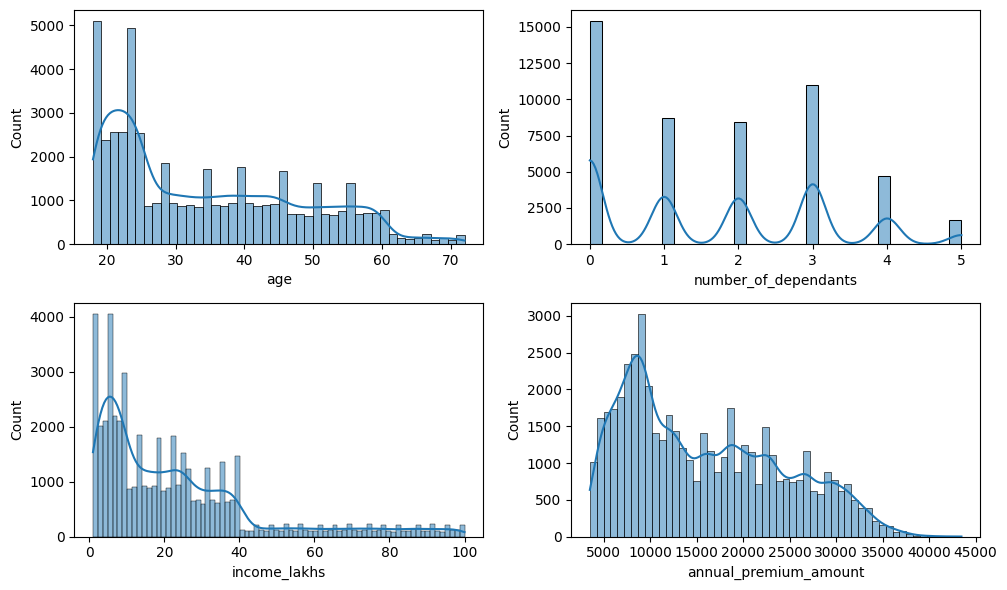

In [976]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_columns_df):
    sns.histplot(df2[column],kde=True, ax=ax)

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [977]:
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [978]:
for i in numeric_columns:
    print(i)

age
number_of_dependants
income_lakhs
annual_premium_amount


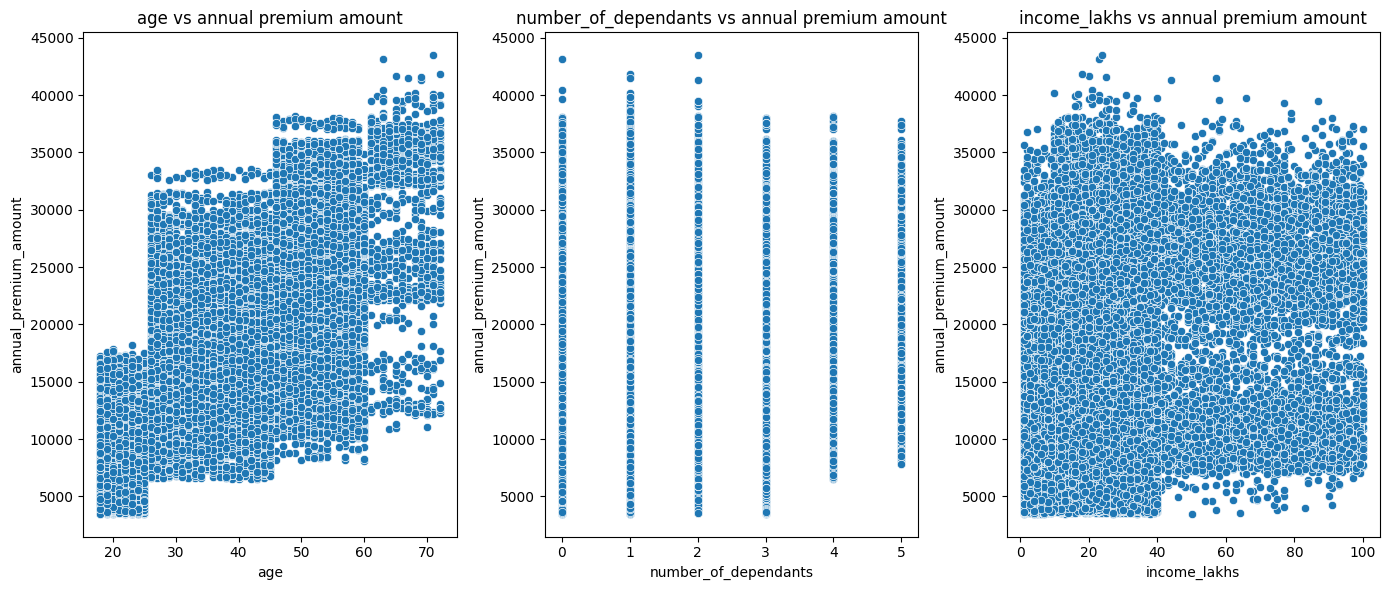

In [979]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs']
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Flatten axes to 1D
axes = axes.flatten()

# Loop through columns and axes
for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df2[column],y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs annual premium amount')

plt.tight_layout()
plt.show()

## Categorical Columns

In [980]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [981]:
categorical_columns = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status', 'income_level','medical_history', 'insurance_plan']

In [982]:
for col in categorical_columns:
    print(f'{col} : ',df2[col].unique())

gender :  ['Male' 'Female']
region :  ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :  ['Unmarried' 'Married']
bmi_category :  ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :  ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status :  ['Salaried' 'Self-Employed' 'Freelancer']
income_level :  ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :  ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :  ['Bronze' 'Silver' 'Gold']


In [983]:
df2['smoking_status'].replace({'Smoking=0':'No Smoking',
                               'Does Not Smoke':'No Smoking',
                               'Not Smoking':'No Smoking'},
                                inplace=True)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_90581/4099879302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0':'No Smoking',


In [984]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

### Univariate Analysis

<Axes: xlabel='gender'>

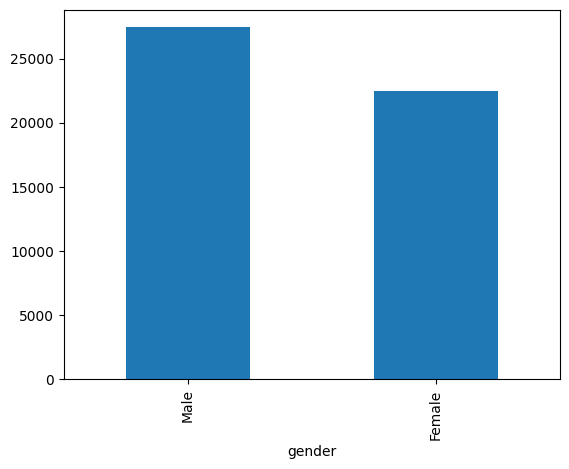

In [985]:
df2['gender'].value_counts().plot(kind='bar')

In [986]:
len(categorical_columns)

9

In [987]:
pct_cnt = df2['gender'].value_counts()
pct_cnt.values

array([27431, 22477])

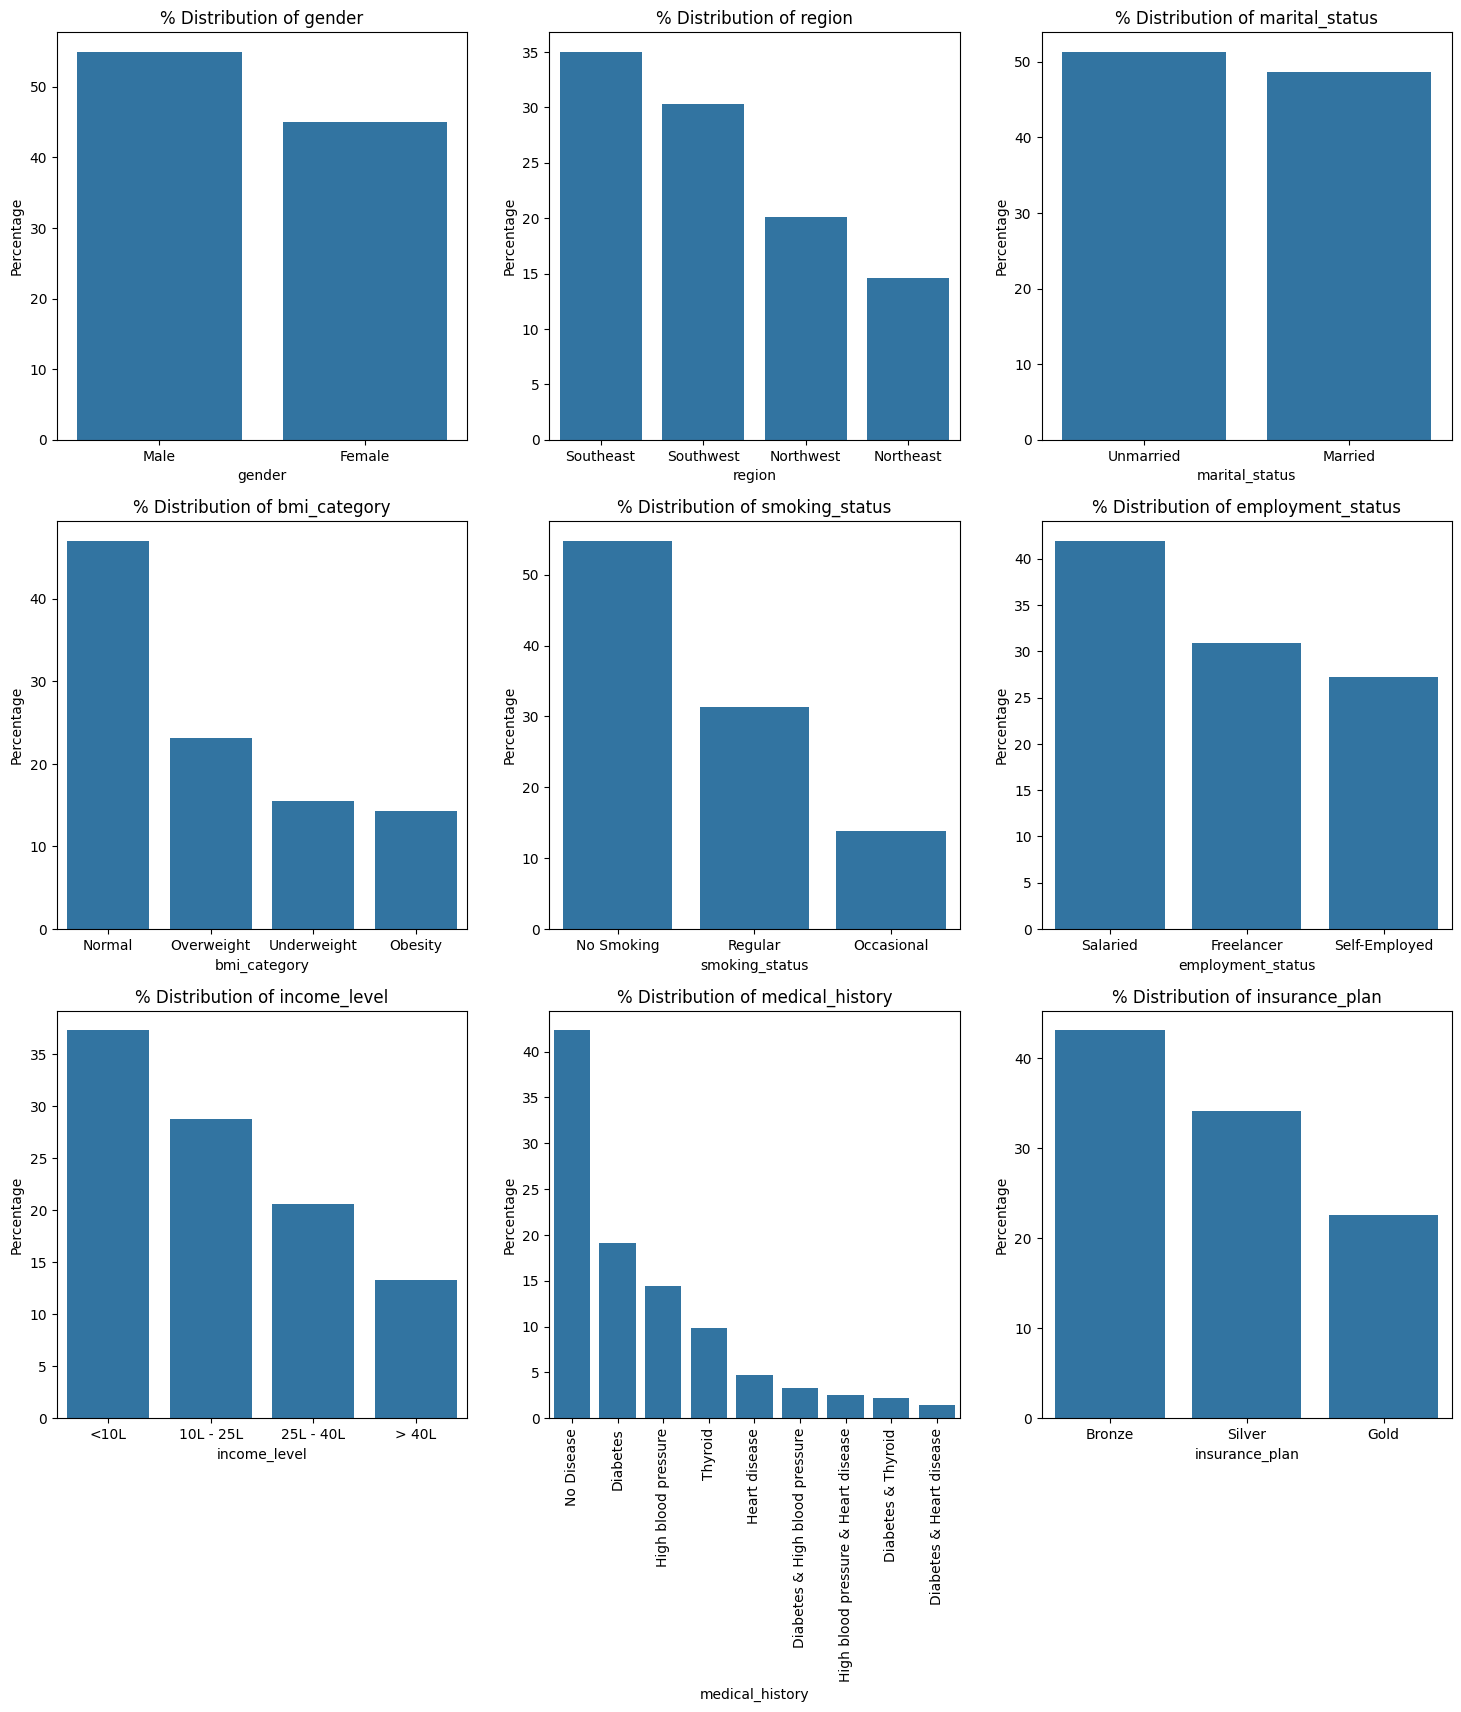

In [988]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten() #flatten 2d array (must use this)

for ax,columns in zip(axes,categorical_columns):
    categ_counts = df2[columns].value_counts(normalize=True)*100
    sns.barplot(x=categ_counts.index,y=categ_counts.values,ax=ax)
    ax.set_title(f'% Distribution of {columns}')
    ax.set_ylabel('Percentage')
    if columns=='medical_history':
        ax.tick_params(axis='x', labelrotation=90)


### Bivariate Analysis

In [989]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


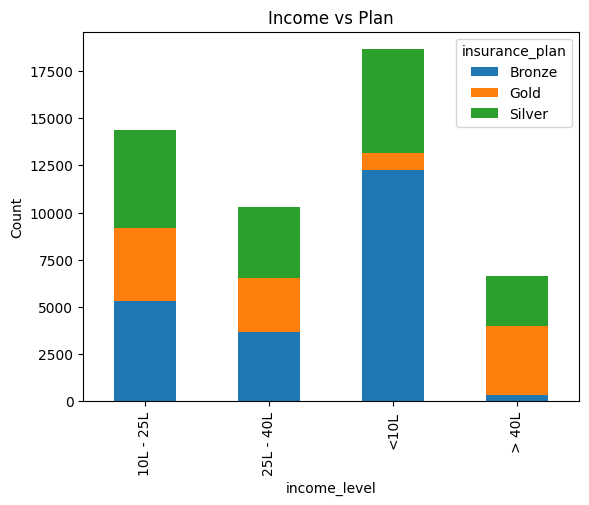

In [990]:
crosstab.plot(kind='bar',stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

In [991]:
# anlayzing using heatmap for better understanding

<Axes: xlabel='insurance_plan', ylabel='income_level'>

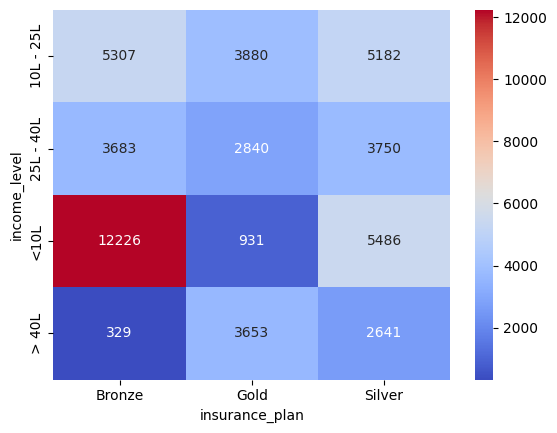

In [992]:
sns.heatmap(crosstab,annot=True,cmap='coolwarm',fmt='d')

## Feature Engineering

In [993]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


In [994]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [995]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_90581/746615070.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
/var/folders/kg/11tps70n3wb66s6pg8w0z5bc0000gn/T/ipykernel_90581/746615070.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [996]:
# Normalizing risk_score
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()

df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


## Encoding Text Columns

### Label encoding : Odinal data

In [997]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [998]:
df2['insurance_plan'] =df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})

In [999]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [1000]:
df2['income_level']= df2['income_level'].map({'<10L':1,'10L - 25L':2,'25L - 40L':3,'> 40L':4,})

### One hot encoding : Nominal Data

In [1001]:
df2.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571


In [1002]:
nominal_col = ['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3 = pd.get_dummies(df2,columns=nominal_col,drop_first=True,dtype=int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   medical_history                  49908 non-null  object 
 5   insurance_plan                   49908 non-null  int64  
 6   annual_premium_amount            49908 non-null  int64  
 7   disease1                         49908 non-null  object 
 8   disease2                         49908 non-null  object 
 9   total_risk_score                 49908 non-null  int64  
 10  normalized_risk_score            49908 non-null  float64
 11  gender_Male                      49908 non-null  int64  
 12  region_Northwest       

In [1003]:
df3.head(1)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0


In [1004]:
df4 = df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


## Calculate VIF Multicolinearity

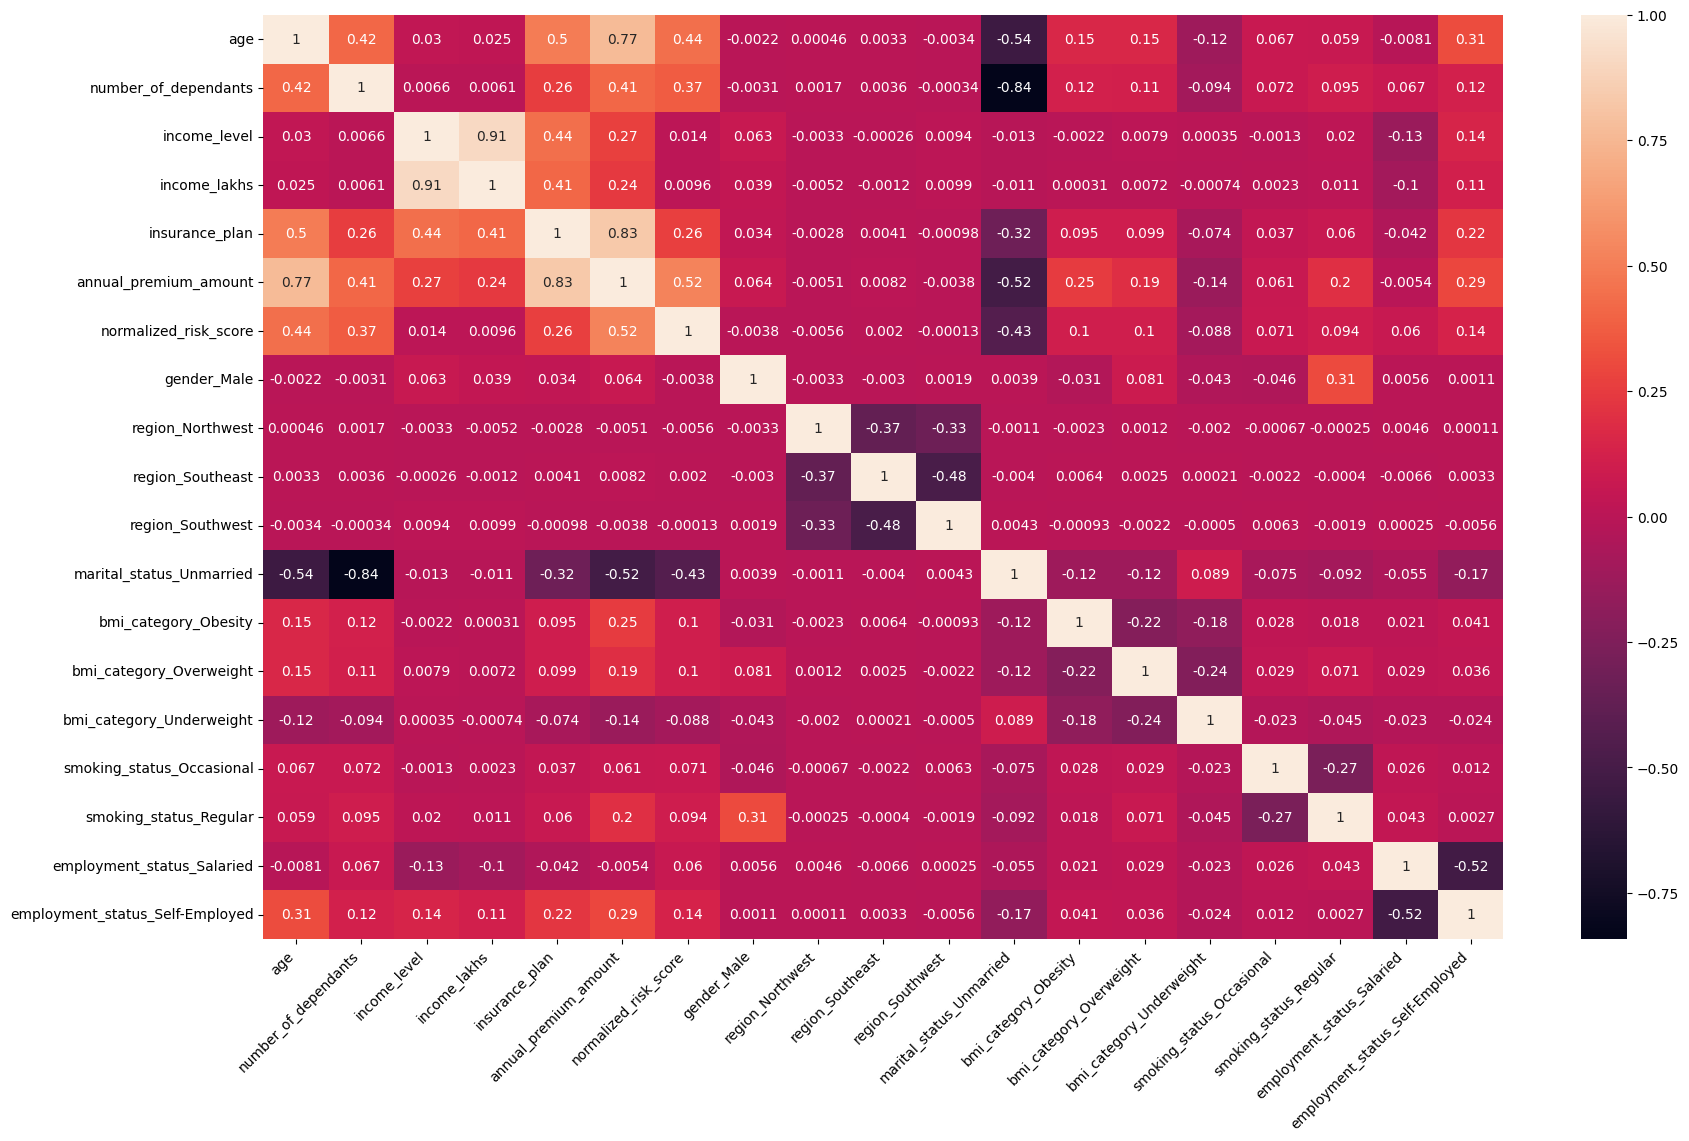

In [1005]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.show()

In [1006]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.describe()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1007]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [1008]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calc_vif(X)    

,Columns,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [1009]:
calc_vif(X.drop('income_level',axis=1))

,Columns,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [1010]:
X_reduced = X.drop('income_level',axis=1)
X_reduced.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0


## Model Training

In [1083]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


In [1017]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size=0.30,random_state=10)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_train',y_test.shape)

X_train (34935, 17)
X_test (14973, 17)
y_train (34935,)
y_train (14973,)


### Linear Regreassion Moldel

In [1041]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score_lr = model_lr.score(X_train,y_train)
test_score_lr = model_lr.score(X_test,y_test)
train_score_lr,test_score_lr

(0.9282143576916762, 0.9280547230217837)

In [1026]:
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = np.sqrt(mse_lr)
mse_lr,rmse_lr


(5165611.913027984, np.float64(2272.7982561212916))

In [1028]:
np.set_printoptions(suppress=True, precision=6)
model_lr.coef_

array([11160.926462,  -676.443991,  -514.229816, 12557.012936,
        4810.357702,   168.646662,   -35.719292,    39.96513 ,
         -24.652929,  -935.760611,  3387.911455,  1599.362268,
         391.171304,   735.912278,  2234.804712,   155.984674,
         415.903973])

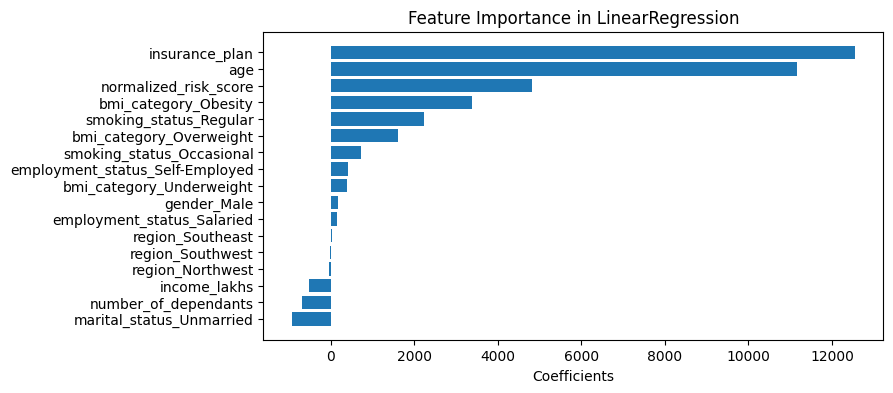

In [1039]:
feature_importance = model_lr.coef_
coef_df = pd.DataFrame(feature_importance,X_test.columns,columns=['Coefficients'])  #(col_arr_items,index_items,col_name)
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title('Feature Importance in LinearRegression')
plt.xlabel('Coefficients')
plt.show()

### Ridge Regression Model

In [1042]:
model_rg = Ridge(alpha=1)
model_rg.fit(X_train,y_train)
train_score_rg = model_rg.score(X_train,y_train)
test_score_rg = model_rg.score(X_test,y_test)
train_score_rg,test_score_rg


(0.9282143198366275, 0.9280541644640349)

In [1043]:
y_pred = model_rg.predict(X_test)
mse_rg = mean_squared_error(y_test,y_pred)
rmse_rg = np.sqrt(mse_rg)
mse_rg,rmse_rg

(5165652.017016499, np.float64(2272.8070787060874))

### XGBoost Model

In [1046]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9782300591468811

In [1047]:
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test,y_pred)
rmse_xgb = np.sqrt(mse_xgb)
mse_xgb, rmse_xgb

(1563064.0, np.float64(1250.2255796455295))

In [1085]:
model_xgb = XGBRegressor()

parameter_grid = {
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth': [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb,parameter_grid,n_iter=10,cv=3,scoring='r2',random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [20, 40, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [1086]:
random_search.best_score_

np.float64(0.9809474547704061)

In [1087]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [1088]:
best_model = random_search.best_estimator_

In [1089]:
feature_importance = best_model.feature_importances_
feature_importance

array([0.41126 , 0.000123, 0.000177, 0.516788, 0.018903, 0.00017 ,
       0.000183, 0.000148, 0.000169, 0.000317, 0.019099, 0.00982 ,
       0.001257, 0.004091, 0.017351, 0.000143, 0.      ], dtype=float32)

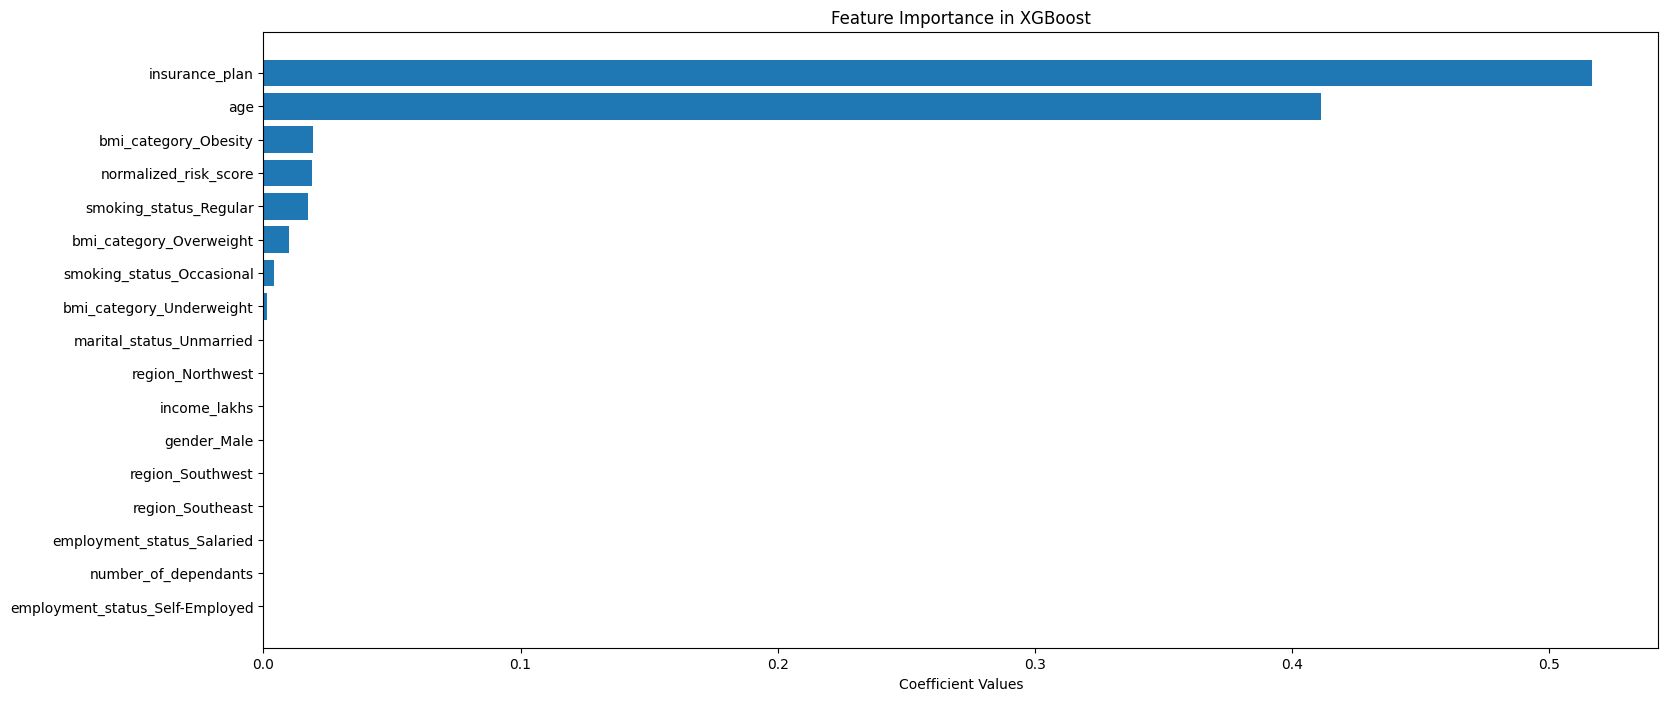

In [1090]:
coef_df = pd.DataFrame(feature_importance,X_train.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)

plt.figure(figsize=(18,8))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title('Feature Importance in XGBoost')
plt.xlabel('Coefficient Values')
plt.show()

## Checking Margin of Error in our best traiend model

In [1091]:
y_pred = best_model.predict(X_test)
residual = y_pred-y_test
residual_pct = (residual/y_test)*100

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residual,
    'diff_pct':residual_pct
})

result_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20334.953125,-219.046875,-1.065714
35794,29647,29378.779297,-268.220703,-0.904714
43608,20560,20618.185547,58.185547,0.283004
42730,5018,7352.829590,2334.829590,46.529087
18936,8929,8203.291992,-725.708008,-8.127540


In [1118]:
extreme_error_threshold = 10
total_extreme_result_df = result_df[abs(result_df['diff_pct'])>extreme_error_threshold]
total_extreme_result = result_df[abs(result_df['diff_pct'])>extreme_error_threshold].shape[0]
total_test_record = X_test.shape[0]
error_pct = (total_extreme_result/total_test_record)*100
error_pct

29.967274427302478

* We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

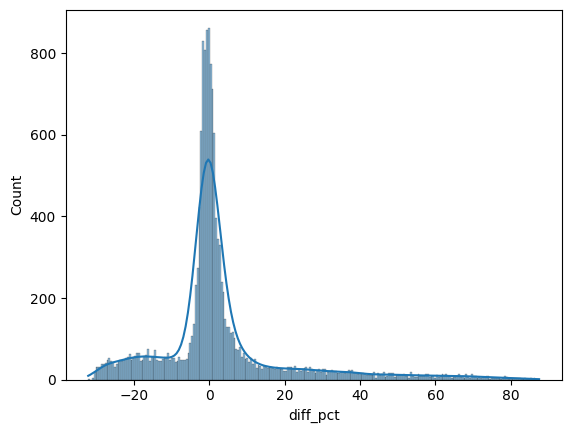

In [1119]:
sns.histplot(result_df['diff_pct'],kde=True)
plt.show()

In [1120]:
result_df[abs(result_df.diff_pct)>50].sort_values(by='diff_pct',ascending=False)

,actual,predicted,diff,diff_pct
36269,3501,6565.852051,3064.852051,87.542189
48801,3516,6565.852051,3049.852051,86.742095
42342,3521,6565.852051,3044.852051,86.476911
18564,3523,6565.852051,3042.852051,86.371049
7988,3527,6565.852051,3038.852051,86.159684
...,...,...,...,...
32671,4656,6994.980957,2338.980957,50.235845
14798,4371,6565.852051,2194.852051,50.213957
13736,4371,6565.852051,2194.852051,50.213957
10107,4710,7073.240723,2363.240723,50.174962


* There will be about 549 customers whom we will overcharge or underchage by more than 50%

### Debugging which feature is reason behind this much of margin of error

In [1125]:
extreme_error_df = X_test.loc[total_extreme_result_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0


In [1147]:
len(X_test.columns)

17

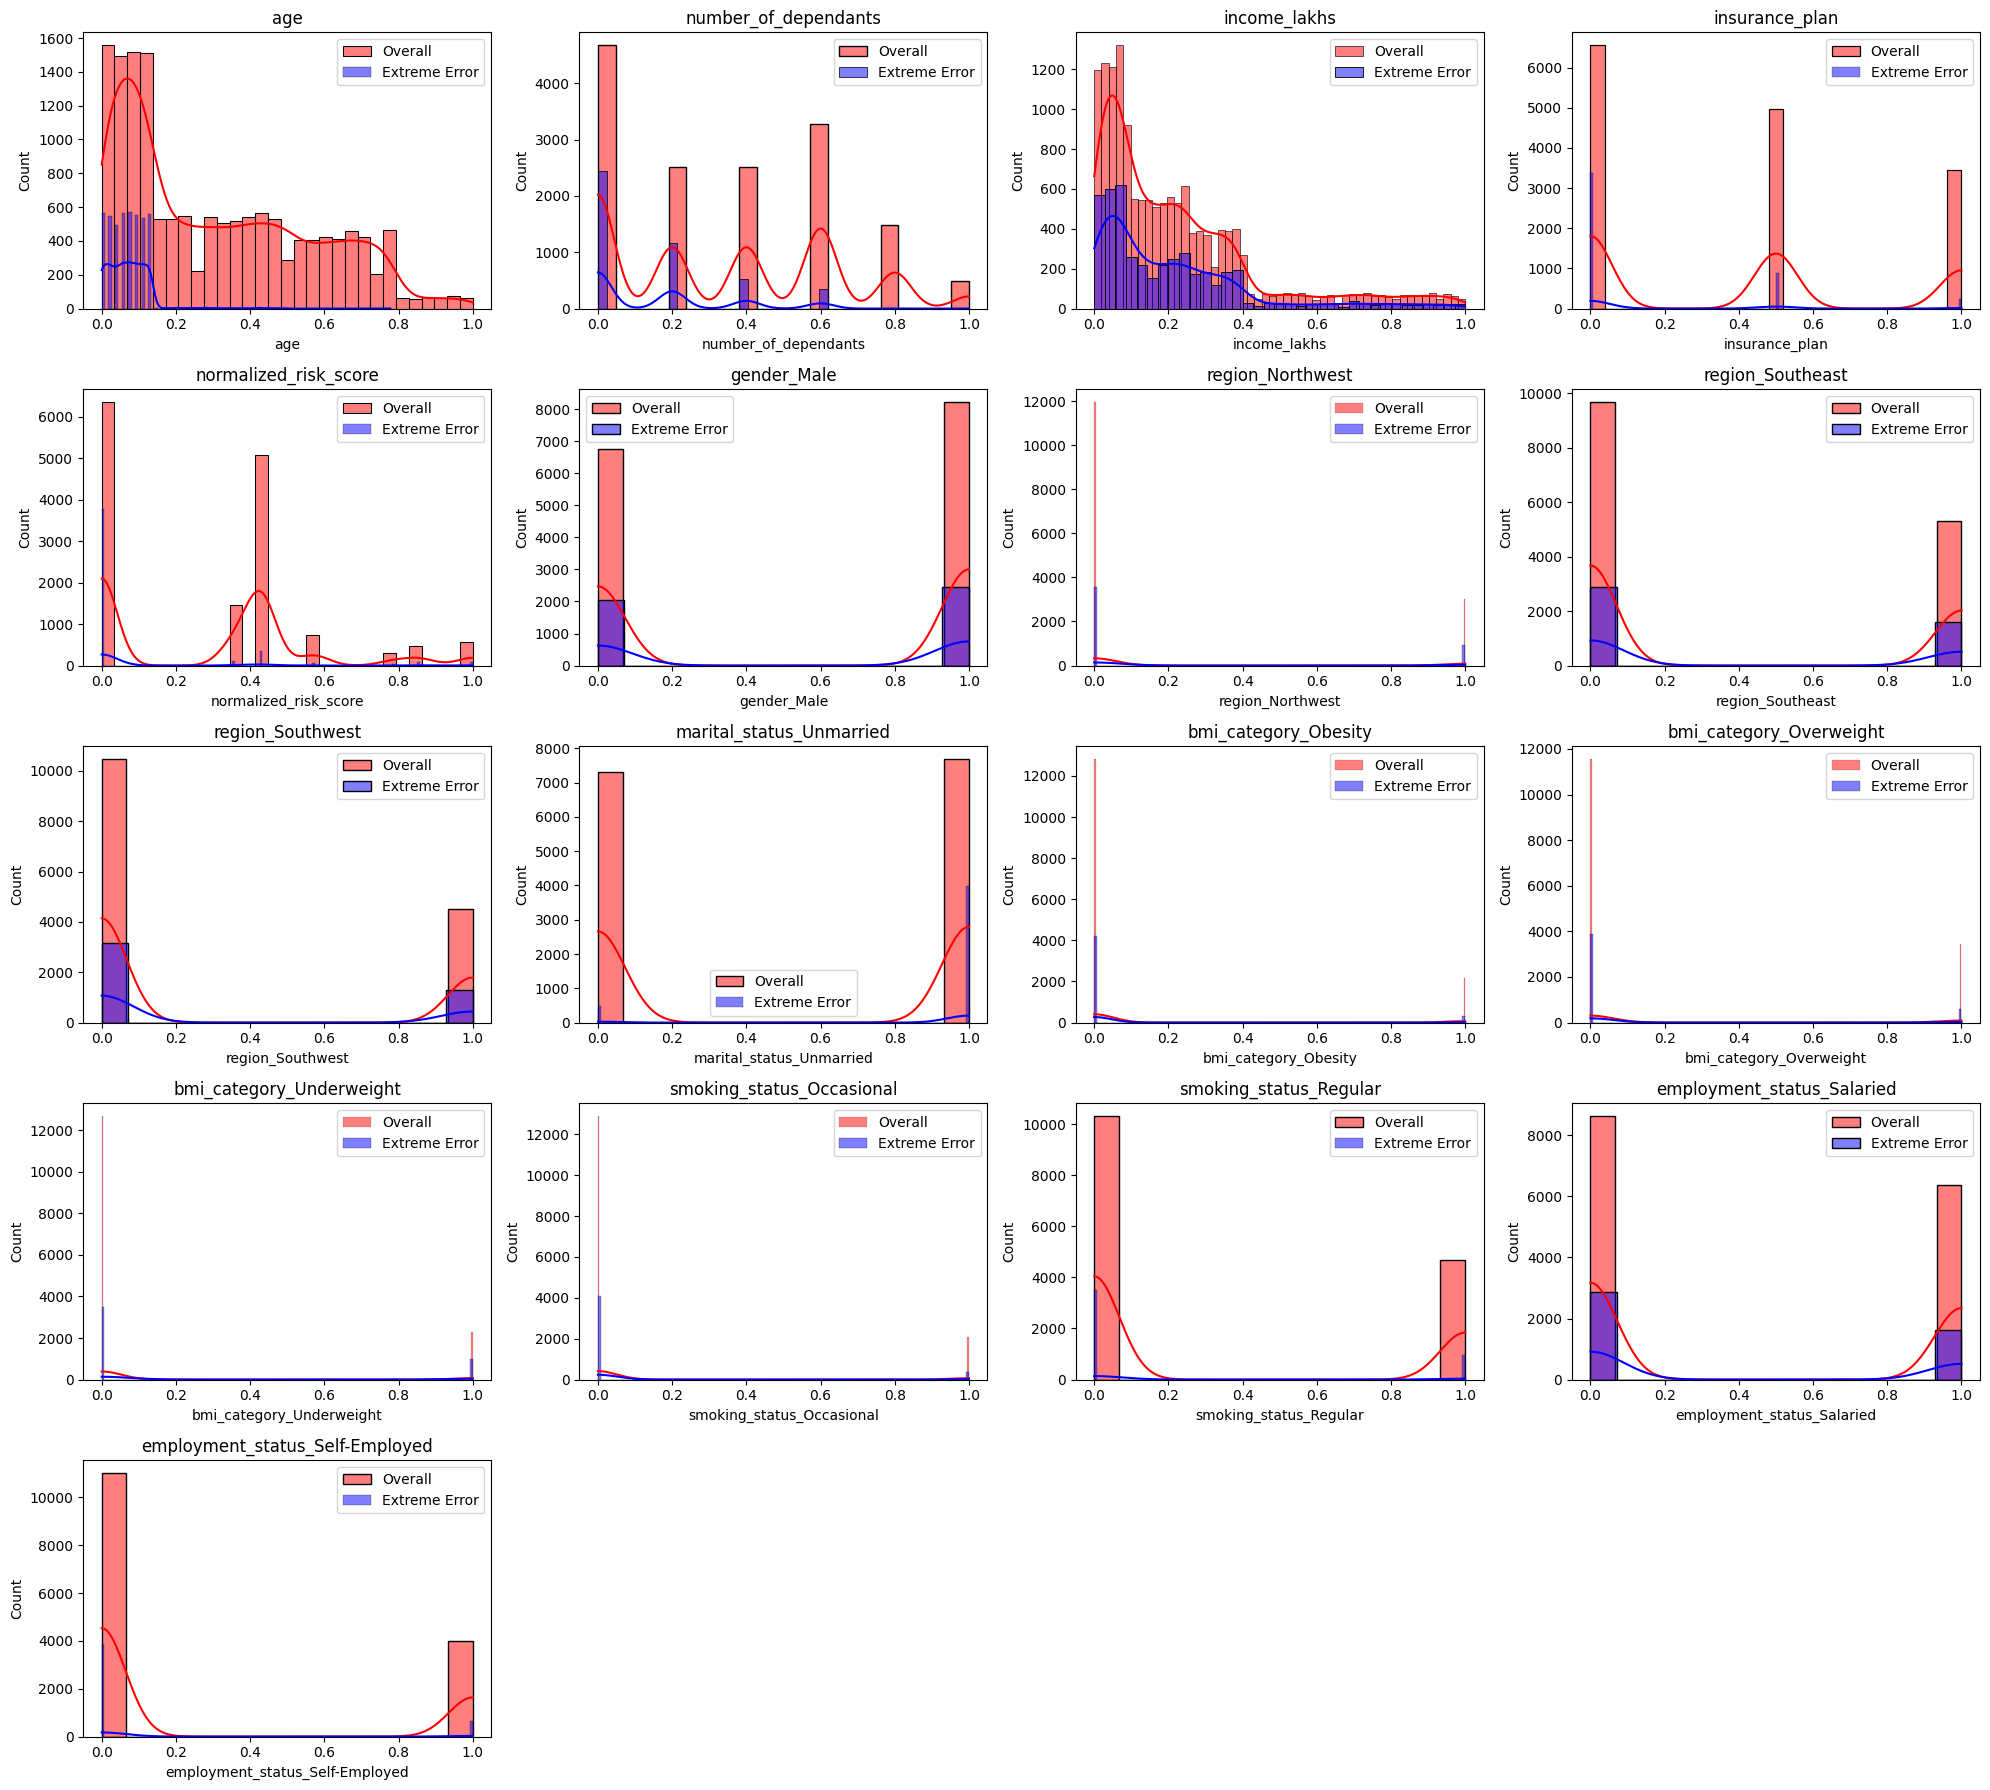

In [1155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 5x4 grid (20 subplots), large enough for 17 histograms
fig, axes = plt.subplots(5, 4, figsize=(20, 18))
axes = axes.flatten()  # Flatten to 1D list

# Loop through the 17 columns
for i, col in enumerate(X_test.columns):
    ax = axes[i]
    sns.histplot(X_test[col], color='red', label='Overall', kde=True, ax=ax)
    sns.histplot(extreme_error_df[col], color='blue', label='Extreme Error', kde=True, ax=ax)
    ax.set_title(col)
    ax.legend()

# Remove the remaining unused subplots (axes[17:] = 3 empty plots)
for j in range(17, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [1159]:
# Errors detected in age graph (both graphs kde is not symmetric)

In [1138]:
reversed_df = pd.DataFrame()
extreme_error_df['income_level']=-1
reversed_df[col_to_scale] = scaler.inverse_transform(extreme_error_df[col_to_scale])
reversed_df

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,19.0,1.0,-2.0,4.0,1.0
2,18.0,1.0,-2.0,3.0,1.0
3,21.0,0.0,-2.0,25.0,1.0
4,24.0,1.0,-2.0,8.0,2.0
...,...,...,...,...,...
4482,19.0,1.0,-2.0,8.0,1.0
4483,25.0,0.0,-2.0,12.0,1.0
4484,21.0,0.0,-2.0,7.0,2.0
4485,21.0,1.0,-2.0,8.0,1.0


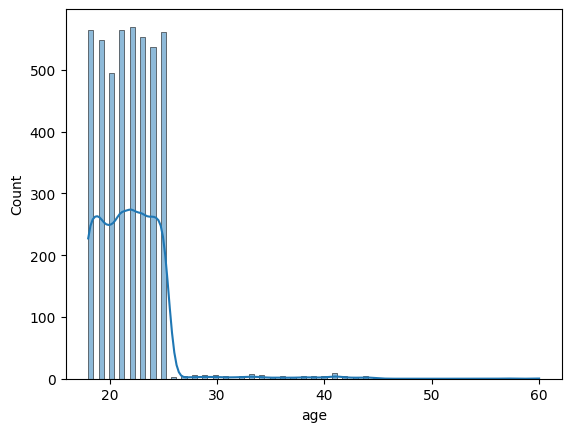

In [1156]:
sns.histplot(reversed_df['age'],kde=True)
plt.show()

In [1144]:
reversed_df['age'].quantile(0.97)

np.float64(25.0)

* 97% of the errors are coming from age group <= 25
* Lets build seperate model for this age group